In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw


g++-12 -std=c++17 -Wall -O3 -o help Newtonian.cpp


In [3]:
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


4.076766542797943
-10.990642207047953 0.005696343753566353
23145.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


3.2806544211944306
-0.061257769204646095 0.813825109543192
1692.0


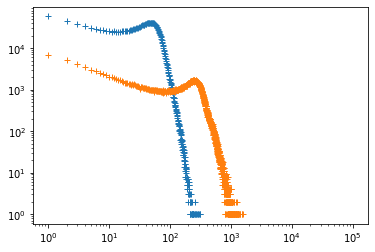

In [4]:
size, amount = np.loadtxt("r2.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, '+')
result = powerlaw.Fit(amount, discrete=True)
print(result.alpha)
R, p = result.distribution_compare('power_law', 'lognormal')
print(R, p)
print(result.xmin)

size, amount = np.loadtxt("r4.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, '+')
result = powerlaw.Fit(amount, discrete=True)
print(result.alpha)
R, p = result.distribution_compare('power_law', 'lognormal')
print(R, p)
print(result.xmin)


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1.180257759645622


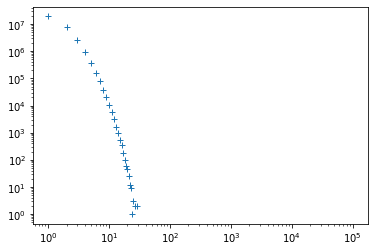

In [6]:
size, amount = np.loadtxt("3D_data_PA.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, '+')
result = powerlaw.Fit(amount, discrete=True)
print(result.alpha)


Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


False


Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


True


Calculating best minimal value for power law fit


True


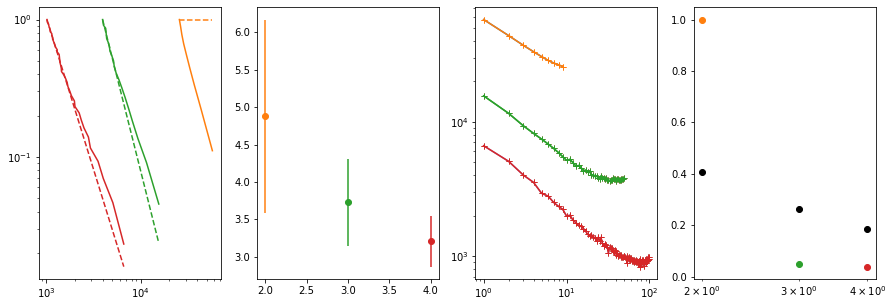

In [30]:
r_list = [2, 3, 4]
cutoff = [10, 50, 100]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')
alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for i, j in zip(r_list, cutoff):
    size, amount = np.loadtxt("r{}.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:j]
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(color=cmap(i-1), label=i, ax=ax[0])
    result.power_law.plot_ccdf(color=cmap(i-1), linestyle='--', ax=ax[0])
    plot_loglog(ax[2], amount)
    x = np.linspace(1, len(amount), (len(amount)))
    ax[1].errorbar(i, result.alpha, yerr=result.sigma, fmt='o', color=cmap(i-1))
    ax[2].plot(x, amount, color=cmap(i-1))
    ax[2].plot(x, amount, '+', color=cmap(i-1))
    ax[3].set_xscale('log')
    ax[3].scatter(i, result.power_law.D, color=cmap(i-1))
    ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
    #ax[3].plot(result.xmins, result.alphas, label=i)
    print(result.power_law.D < 1.22385/np.sqrt(result.n) )



#ax[3].plot(r_list, p_list, 'o')


Maak ook nog een dichtheidsafhankelijke plot nparticles/size**3

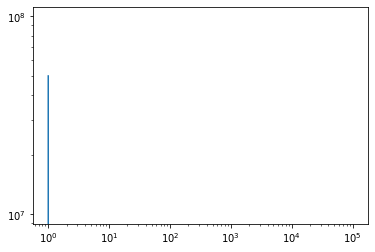

In [5]:
size, amount = np.loadtxt("PA_r4_false.txt", skiprows=1, unpack=True)
amount = amount[1:]
size = size[1:]
plt.loglog(size, amount)


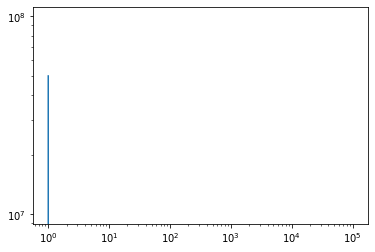

In [6]:
size, amount = np.loadtxt("3D_data_PA.txt", skiprows=1, unpack=True)
amount = amount[1:]
size = size[1:]
plt.loglog(size, amount)